In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(72, 72)


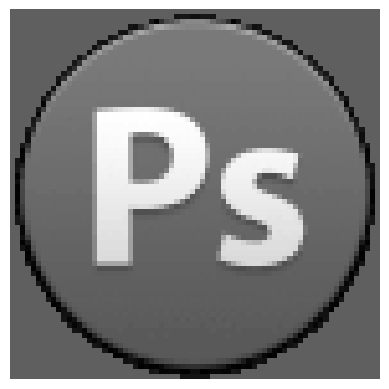

In [4]:
I = cv2.imread("icon01.png", 0)
plt.imshow(I, cmap = "gray");plt.axis("off")
print(I.shape)

In [15]:
width, height = I.shape
new_img = np.zeros_like(I, dtype = np.complexfloating)
for row in range(width):
    for column in range(height):
        
        for x in range(width):
            for y in range(height):
                
                new_img[row, column] += ( I[x, y] * np.exp(-2j * np.pi * ((row  *  x  / width ) + (column * y / height)))) / (width * height)


In [33]:
i_new_img = np.zeros_like(I, dtype = np.complexfloating)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img[row, column] += new_img[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height)) 

In [36]:
def energy_Top_Left (arr, value):
    new_restructor = np.copy(arr)
    new_restructor[:value] = 0
    new_restructor[...,:value] = 0
    return new_restructor

**Invese DFT by restructed 5 pixel**

In [37]:
i_new_img_5 = np.zeros_like(I, dtype = np.complexfloating)
img_5 = energy_Top_Left(I, 5)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img[row, column] += img_5[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height)) 

**Invese DFT by restructed 10 pixel**

In [38]:
i_new_img_10 = np.zeros_like(I, dtype = np.complexfloating)
img_10= energy_Top_Left(I, 10)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img_10[row, column] += img_10[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height)) 

**Invese DFT by restructed 40 pixel**

In [39]:
i_new_img_40 = np.zeros_like(I, dtype = np.complexfloating)
img_40 = energy_Top_Left(I, 40)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img_40[row, column] += img_40[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height)) 

In [31]:
def energy_Bottm_Right (arr, value):
    new_restructor = np.copy(arr)
    new_restructor[:value] = 0
    new_restructor[...,:value] = 0
    return new_restructor

**Invese DFT by restructed 20 pixel Bottm Right**

In [ ]:
i_new_img_20 = np.zeros_like(I, dtype=np.complexfloating)
img_20 = energy_Bottm_Right(I, 5)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img_20[row, column] += img_20[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height))

**Invese DFT by restructed 40 pixel Bottm Right**

In [ ]:
i_new_img_40b = np.zeros_like(I, dtype=np.complexfloating)
img_40b = energy_Bottm_Right(I, 40)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img_40b[row, column] += img_40b[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height))

**Invese DFT by restructed 65 pixel Bottm Right**

In [ ]:
i_new_img_65 = np.zeros_like(I, dtype=np.complexfloating)
img_65 = energy_Bottm_Right(I, 10)
for row in range(width):
    for column in range(height):
        for x in range(width):
            for y in range(height):
                i_new_img_65[row, column] += img_65[x, y] * np.exp(2j * np.pi * (row * x / width + column * y / height))

C:\Users\khaled\AppData\Local\Temp\ipykernel_22356\2150173133.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[0, 1].imshow(i_new_img.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("inverse DFT")
C:\Users\khaled\AppData\Local\Temp\ipykernel_22356\2150173133.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1, 0].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("inverse DFT by 5px TOP-LEFT")
C:\Users\khaled\AppData\Local\Temp\ipykernel_22356\2150173133.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1, 1].imshow(i_new_img_10.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("inverse DFT by 10px TOP-LEFT")
C:\Users\khaled\AppData\Local\Temp\ipykernel_22356\2150173133.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[1, 2].imshow(i_ne

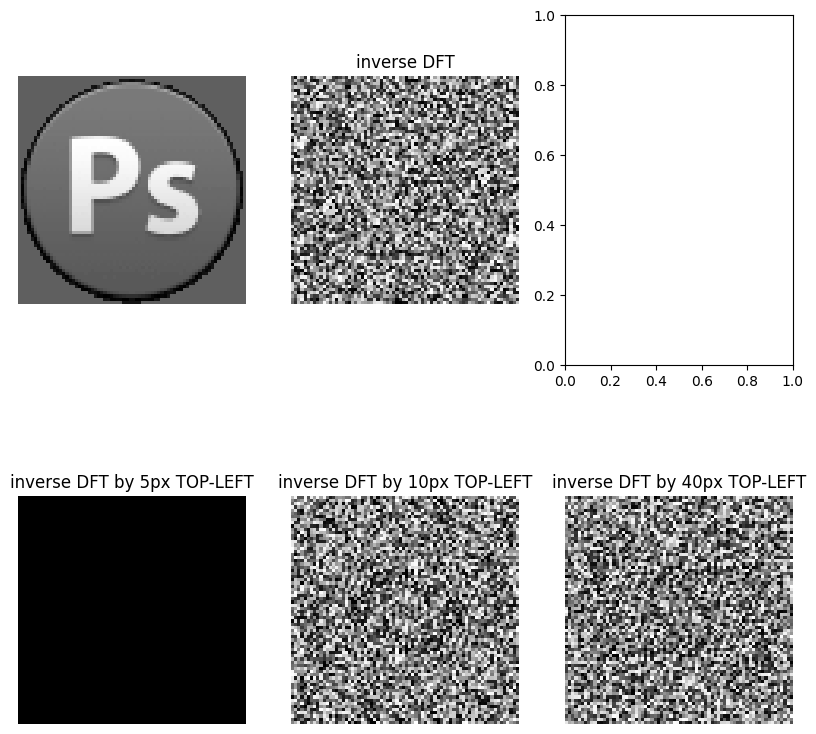

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes[0, 0].imshow(I, cmap = "gray");axes[0, 0].axis("off")
axes[0, 1].imshow(i_new_img.astype(np.uint8), cmap = "gray");axes[0, 1].axis("off");axes[0, 1].set_title("inverse DFT")
axes[1, 0].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[1, 0].axis("off");axes[1, 0].set_title("inverse DFT by 5px TOP-LEFT")
axes[1, 1].imshow(i_new_img_10.astype(np.uint8), cmap = "gray");axes[1, 1].axis("off");axes[1, 1].set_title("inverse DFT by 10px TOP-LEFT")
axes[1, 2].imshow(i_new_img_40.astype(np.uint8), cmap = "gray");axes[1, 2].axis("off");axes[1, 2].set_title("inverse DFT by 40px TOP-LEFT")
axes[2, 0].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[2, 0].axis("off");axes[2, 0].set_title("inverse DFT by 20px BOTTOM-RIGHT ")
axes[2, 1].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[2, 1].axis("off");axes[2, 1].set_title("inverse DFT by 40px BOTTOM-RIGHT")
axes[2, 2].imshow(i_new_img_5.astype(np.uint8), cmap = "gray");axes[2, 2].axis("off");axes[2, 2].set_title("inverse DFT by 65px BOTTOM-RIGHT")
plt.show()

In [ ]:
test = np.array([[3, 5, 6, 0],
                        [6, 2, 6, 7],
                        [1, 4, 6, 7]])
test